In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [3]:
data=pd.read_csv('synthetic_automobile_crash_data_india.csv')
data.head(10)

,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,Vehicle_height,Safety_rating,Number_of_airbags,ABS_presence,ESC_presence,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,Mahindra,sedan,2008,diesel,2001,automatic,6,1160,4072,1498,1500,2,2,NaN,1.0,1.0,0.0,rural,clear,dry,morning,Monday,75,Male,severe
1,Honda,sedan,2014,CNG,2959,manual,4,1949,3947,1933,1719,1,5,0.0,1.0,0.0,1.0,NaN,clear,NaN,night,Saturday,80,Female,severe
2,Tata Motors,SUV,2015,electric,1694,manual,4,1943,4785,1885,1628,4,1,True,True,True,True,rural,clear,dry,afternoon,Monday,41,Female,severe
3,Honda,pickup,2020,CNG,1168,manual,6,1013,3800,1470,1602,1,4,1.0,0.0,1.0,1.0,NaN,clear,dry,night,Monday,45,Female,severe
4,Honda,hatchback,2007,CNG,1735,manual,3,2134,4472,1827,1484,3,6,0.0,1.0,1.0,1.0,urban,clear,dry,afternoon,NaN,50,Female,severe
5,Hyundai,pickup,2015,CNG,1567,manual,6,1441,4048,1685,1458,3,2,1.0,NaN,NaN,1.0,urban,clear,dry,evening,Tuesday,60,Male,severe
6,Tata Motors,pickup,2004,CNG,1472,automatic,6,1405,4494,1715,1608,3,5,1.0,1.0,NaN,1.0,urban,clear,NaN,evening,Sunday,22,Male,severe
7,Tata Motors,SUV,2017,CNG,1510,automatic,4,1888,4503,1876,1415,1,6,1.0,1.0,1.0,1.0,rural,fog,dry,afternoon,Friday,70,Male,severe
8,Tata Motors,pickup,2019,CNG,1512,automatic,6,1165,4757,1966,1788,2,4,1.0,0.0,1.0,NaN,rural,clear,dry,night,Saturday,55,Male,severe
9,Honda,pickup,2013,electric,1619,automatic,4,2028,4724,1526,1443,2,7,1.0,1.0,1.0,0.0,urban,rain,dry,evening,Tuesday,76,Male,severe


In [4]:
data.isnull().sum().sort_values(ascending=False)

Day_of_week                1271
Road_surface_conditions    1042
Weather_conditions         1026
Crash_location             1026
ESC_presence                752
ABS_presence                744
TCS_presence                722
TPMS_presence               685
Driver_gender               301
Vehicle_make                  0
Driver_age                    0
Time_of_day                   0
Number_of_airbags             0
Vehicle_type                  0
Safety_rating                 0
Vehicle_height                0
Vehicle_width                 0
Vehicle_length                0
Vehicle_weight                0
Number_of_cylinders           0
Transmission_type             0
Engine_displacement           0
Engine_type                   0
Vehicle_year                  0
Crash_severity                0
dtype: int64

In [5]:
data['Day_of_week']=data.groupby(by='Crash_severity')['Day_of_week'].apply(lambda x:x.fillna(x.mode()[0]))

In [6]:
data['Road_surface_conditions']=data['Road_surface_conditions'].fillna(data['Road_surface_conditions'].mode()[0])

In [7]:
data['Crash_location']=data['Crash_location'].fillna(data['Crash_location'].mode()[0])

In [8]:
data['Weather_conditions']=data.groupby(by='Time_of_day')['Weather_conditions'].apply(lambda x:x.fillna(x.mode()[0]))

In [9]:
data['ESC_presence']=data.groupby(by='Vehicle_type')['ESC_presence'].apply(lambda x:x.fillna(x.mode()[0]))

In [10]:
data['ABS_presence']=data.groupby(by='Vehicle_type')['ABS_presence'].apply(lambda x:x.fillna(x.mode()[0]))

In [11]:
data['TCS_presence']=data['TCS_presence'].fillna(data['TCS_presence'].mode()[0])

In [12]:
data['TPMS_presence']=data.groupby(by='Vehicle_type')['TPMS_presence'].apply(lambda x:x.fillna(x.mode()[0]))

In [13]:
data['Driver_gender']=data['Driver_gender'].fillna(data['Driver_gender'].mode()[0])

In [14]:
data.isnull().sum()

Vehicle_make               0
Vehicle_type               0
Vehicle_year               0
Engine_type                0
Engine_displacement        0
Transmission_type          0
Number_of_cylinders        0
Vehicle_weight             0
Vehicle_length             0
Vehicle_width              0
Vehicle_height             0
Safety_rating              0
Number_of_airbags          0
ABS_presence               0
ESC_presence               0
TCS_presence               0
TPMS_presence              0
Crash_location             0
Weather_conditions         0
Road_surface_conditions    0
Time_of_day                0
Day_of_week                0
Driver_age                 0
Driver_gender              0
Crash_severity             0
dtype: int64

In [15]:
data.head(10)

,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,Vehicle_height,Safety_rating,Number_of_airbags,ABS_presence,ESC_presence,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,Mahindra,sedan,2008,diesel,2001,automatic,6,1160,4072,1498,1500,2,2,1.0,1.0,1.0,0.0,rural,clear,dry,morning,Monday,75,Male,severe
1,Honda,sedan,2014,CNG,2959,manual,4,1949,3947,1933,1719,1,5,0.0,1.0,0.0,1.0,urban,clear,dry,night,Saturday,80,Female,severe
2,Tata Motors,SUV,2015,electric,1694,manual,4,1943,4785,1885,1628,4,1,True,True,True,True,rural,clear,dry,afternoon,Monday,41,Female,severe
3,Honda,pickup,2020,CNG,1168,manual,6,1013,3800,1470,1602,1,4,1.0,0.0,1.0,1.0,urban,clear,dry,night,Monday,45,Female,severe
4,Honda,hatchback,2007,CNG,1735,manual,3,2134,4472,1827,1484,3,6,0.0,1.0,1.0,1.0,urban,clear,dry,afternoon,Saturday,50,Female,severe
5,Hyundai,pickup,2015,CNG,1567,manual,6,1441,4048,1685,1458,3,2,1.0,1.0,1.0,1.0,urban,clear,dry,evening,Tuesday,60,Male,severe
6,Tata Motors,pickup,2004,CNG,1472,automatic,6,1405,4494,1715,1608,3,5,1.0,1.0,1.0,1.0,urban,clear,dry,evening,Sunday,22,Male,severe
7,Tata Motors,SUV,2017,CNG,1510,automatic,4,1888,4503,1876,1415,1,6,1.0,1.0,1.0,1.0,rural,fog,dry,afternoon,Friday,70,Male,severe
8,Tata Motors,pickup,2019,CNG,1512,automatic,6,1165,4757,1966,1788,2,4,1.0,0.0,1.0,1.0,rural,clear,dry,night,Saturday,55,Male,severe
9,Honda,pickup,2013,electric,1619,automatic,4,2028,4724,1526,1443,2,7,1.0,1.0,1.0,0.0,urban,rain,dry,evening,Tuesday,76,Male,severe


In [16]:
data['ABS_presence']=data['ABS_presence'].replace({'1.0':1,'True':1,'0.0':0})

In [17]:
data['ABS_presence'].value_counts()

1    8462
0    1538
Name: ABS_presence, dtype: int64

In [18]:
data['ESC_presence']=data['ESC_presence'].replace({'1.0':1,'True':1,'0.0':0})

In [19]:
data['ESC_presence'].value_counts()

1    8557
0    1443
Name: ESC_presence, dtype: int64

In [20]:
data['TCS_presence']=data['TCS_presence'].replace({'1.0':1,'True':1,'0.0':0})

In [21]:
data['TCS_presence'].value_counts()

1    8414
0    1586
Name: TCS_presence, dtype: int64

In [22]:
data['TPMS_presence']=data['TPMS_presence'].replace({'1.0':1,'True':1,'0.0':0})

In [23]:
data['TPMS_presence'].value_counts()

1    8452
0    1548
Name: TPMS_presence, dtype: int64

In [24]:
data1=data

In [25]:
data1.head(10)

,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,Vehicle_height,Safety_rating,Number_of_airbags,ABS_presence,ESC_presence,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity
0,Mahindra,sedan,2008,diesel,2001,automatic,6,1160,4072,1498,1500,2,2,1,1,1,0,rural,clear,dry,morning,Monday,75,Male,severe
1,Honda,sedan,2014,CNG,2959,manual,4,1949,3947,1933,1719,1,5,0,1,0,1,urban,clear,dry,night,Saturday,80,Female,severe
2,Tata Motors,SUV,2015,electric,1694,manual,4,1943,4785,1885,1628,4,1,1,1,1,1,rural,clear,dry,afternoon,Monday,41,Female,severe
3,Honda,pickup,2020,CNG,1168,manual,6,1013,3800,1470,1602,1,4,1,0,1,1,urban,clear,dry,night,Monday,45,Female,severe
4,Honda,hatchback,2007,CNG,1735,manual,3,2134,4472,1827,1484,3,6,0,1,1,1,urban,clear,dry,afternoon,Saturday,50,Female,severe
5,Hyundai,pickup,2015,CNG,1567,manual,6,1441,4048,1685,1458,3,2,1,1,1,1,urban,clear,dry,evening,Tuesday,60,Male,severe
6,Tata Motors,pickup,2004,CNG,1472,automatic,6,1405,4494,1715,1608,3,5,1,1,1,1,urban,clear,dry,evening,Sunday,22,Male,severe
7,Tata Motors,SUV,2017,CNG,1510,automatic,4,1888,4503,1876,1415,1,6,1,1,1,1,rural,fog,dry,afternoon,Friday,70,Male,severe
8,Tata Motors,pickup,2019,CNG,1512,automatic,6,1165,4757,1966,1788,2,4,1,0,1,1,rural,clear,dry,night,Saturday,55,Male,severe
9,Honda,pickup,2013,electric,1619,automatic,4,2028,4724,1526,1443,2,7,1,1,1,0,urban,rain,dry,evening,Tuesday,76,Male,severe


In [26]:
data['Crash_severity'].value_counts()

severe      7868
moderate    2112
minor         20
Name: Crash_severity, dtype: int64

In [27]:
data.head().columns

Index(['Vehicle_make', 'Vehicle_type', 'Vehicle_year', 'Engine_type',
       'Engine_displacement', 'Transmission_type', 'Number_of_cylinders',
       'Vehicle_weight', 'Vehicle_length', 'Vehicle_width', 'Vehicle_height',
       'Safety_rating', 'Number_of_airbags', 'ABS_presence', 'ESC_presence',
       'TCS_presence', 'TPMS_presence', 'Crash_location', 'Weather_conditions',
       'Road_surface_conditions', 'Time_of_day', 'Day_of_week', 'Driver_age',
       'Driver_gender', 'Crash_severity'],
      dtype='object')

In [28]:
num_cols=data1.select_dtypes(include=np.number).columns

In [29]:
num_cols

Index(['Vehicle_year', 'Engine_displacement', 'Number_of_cylinders',
       'Vehicle_weight', 'Vehicle_length', 'Vehicle_width', 'Vehicle_height',
       'Safety_rating', 'Number_of_airbags', 'ABS_presence', 'ESC_presence',
       'TCS_presence', 'TPMS_presence', 'Driver_age'],
      dtype='object')

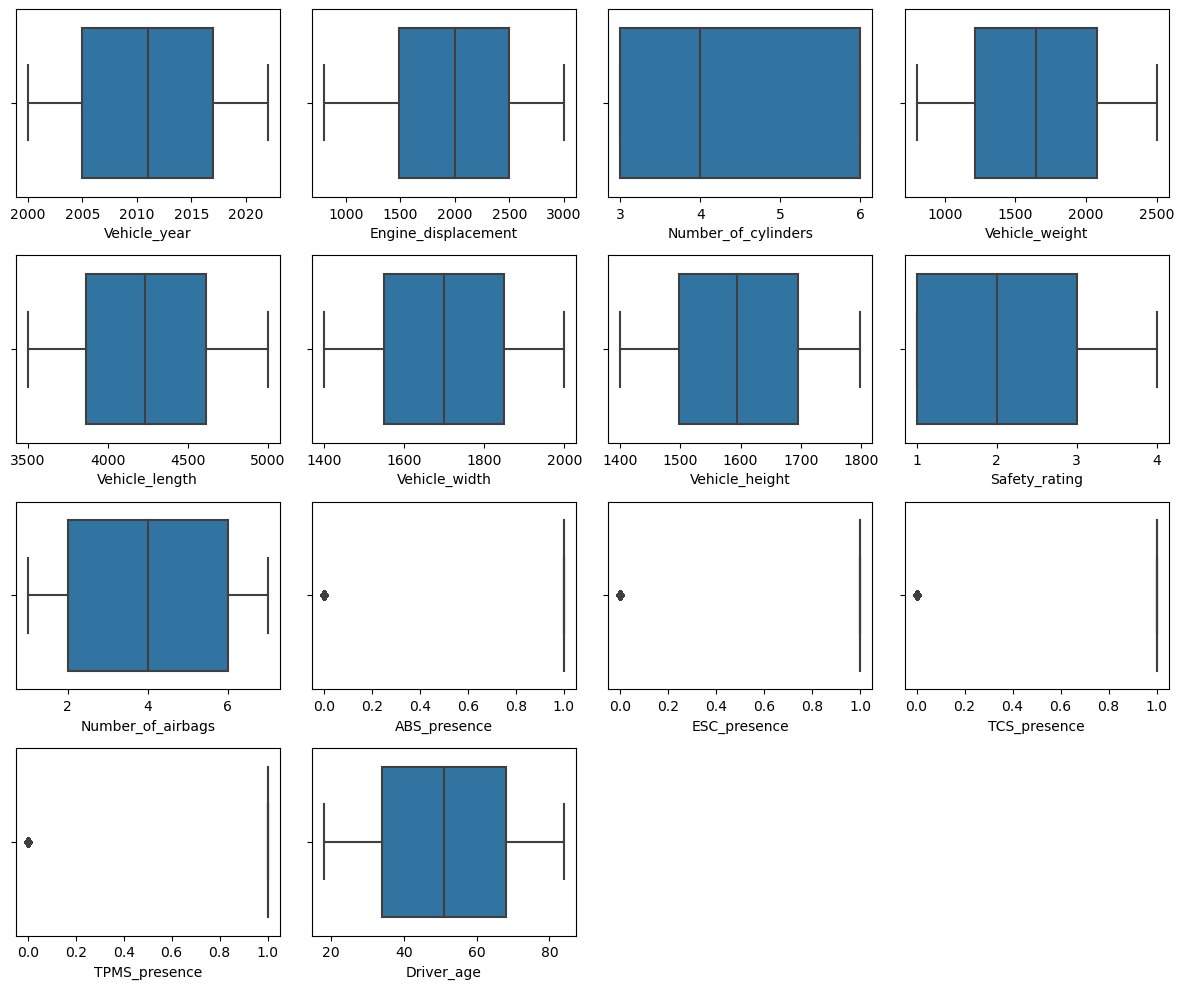

In [30]:
plt.figure(figsize=(12,10))
j=1
for i in num_cols:
    plt.subplot(4,4,j)
    sns.boxplot(x=data1[i])
    j+=1
plt.tight_layout()
plt.show()

In [31]:
# feature engineering for Vehicle_year, Engine_displacement, Vehicle_weight, Vehicle_length,Vehicle_height,Driver_age

In [32]:
data1['Vehicle_year'].value_counts()

2015    487
2001    457
2012    456
2006    452
2003    452
2014    448
2009    446
2016    445
2021    440
2017    439
2013    439
2018    430
2005    429
2007    429
2000    427
2022    423
2002    422
2011    419
2010    416
2019    416
2008    413
2004    411
2020    404
Name: Vehicle_year, dtype: int64

In [33]:
data['Vehicle_year'].replace({2015:'new_model',2001:'old_model',2012:'new_model',2006:'old_model',
                                                  2003:'old_model',2014:'new_model',2009:'old_model',2016:'new_model',
                                                  2021:'new_model',2017:'new_model',2013:'new_model',2018:'new_model',
                                                  2005:'old_model',2007:'old_model',2000:'old_model',2022:'new_model',
                                                  2002:'old_model',2011:'new_model',2010:'old_model',2019:'new_model',
                                                  2008:'old_model',2004:'old_model',2020:'new_model'},inplace=True)

In [34]:
data['Vehicle_year'].value_counts()

new_model    5246
old_model    4754
Name: Vehicle_year, dtype: int64

In [35]:
#age

In [36]:
data['Driver_age'].value_counts()

42    179
58    179
29    175
33    174
70    173
     ... 
39    131
82    131
40    130
41    121
21    112
Name: Driver_age, Length: 67, dtype: int64

In [37]:
data['Driver_age'].replace({18:'young_age',19:'young_age',20:'young_age',21:'young_age',22:'young_age',23:'young_age',
                           24:'young_age',25:'young_age',26:'young_age',27:'young_age',28:'young_age',29:'young_age',
                           30:'young_age',31:'young_age',32:'young_age',33:'young_age',34:'young_age',35:'young_age',
                           36:'middle_age',37:'middle_age',38:'middle_age',39:'middle_age',40:'middle_age',
                           41:'middle_age',42:'middle_age',43:'middle_age',44:'middle_age',45:'middle_age',
                           46:'middle_age',47:'middle_age',48:'middle_age',49:'middle_age',50:'middle_age',
                           51:'middle_age',52:'middle_age',53:'middle_age',54:'middle_age',55:'middle_age',
                           56:'middle_age',57:'middle_age',58:'middle_age',59:'middle_age',60:'middle_age',
                           61:'old_age',62:'old_age',63:'old_age',64:'old_age',65:'old_age',66:'old_age',
                           67:'old_age',68:'old_age',69:'old_age',70:'old_age',71:'old_age',72:'old_age',
                           73:'old_age',74:'old_age',75:'old_age',76:'old_age',77:'old_age',78:'old_age',
                           79:'old_age',80:'old_age',81:'old_age',82:'old_age',83:'old_age',84:'old_age',
                           85:'old_age'},inplace=True)

In [38]:
data['Driver_age'].value_counts()

middle_age    3658
old_age       3629
young_age     2713
Name: Driver_age, dtype: int64

In [39]:
data['Car_Front_m2']=(data['Vehicle_width']*data['Vehicle_height'])/1000000
data['Car_side_m2']=(data['Vehicle_length']*data['Vehicle_height'])/1000000
data['Car_vol_m2']=(data['Vehicle_length']*data['Vehicle_height']*data['Vehicle_width'])/1000000000

In [40]:
data['Car_Front_m2'].value_counts()

2.346663    4
2.442240    3
2.798640    3
2.437996    3
2.560800    3
           ..
2.595058    1
2.445975    1
2.520399    1
2.975544    1
2.815232    1
Name: Car_Front_m2, Length: 9595, dtype: int64

In [41]:
data.head()

,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Vehicle_length,Vehicle_width,Vehicle_height,Safety_rating,Number_of_airbags,ABS_presence,ESC_presence,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity,Car_Front_m2,Car_side_m2,Car_vol_m2
0,Mahindra,sedan,old_model,diesel,2001,automatic,6,1160,4072,1498,1500,2,2,1,1,1,0,rural,clear,dry,morning,Monday,old_age,Male,severe,2.247000,6.108000,9.149784
1,Honda,sedan,new_model,CNG,2959,manual,4,1949,3947,1933,1719,1,5,0,1,0,1,urban,clear,dry,night,Saturday,old_age,Female,severe,3.322827,6.784893,13.115198
2,Tata Motors,SUV,new_model,electric,1694,manual,4,1943,4785,1885,1628,4,1,1,1,1,1,rural,clear,dry,afternoon,Monday,middle_age,Female,severe,3.068780,7.789980,14.684112
3,Honda,pickup,new_model,CNG,1168,manual,6,1013,3800,1470,1602,1,4,1,0,1,1,urban,clear,dry,night,Monday,middle_age,Female,severe,2.354940,6.087600,8.948772
4,Honda,hatchback,old_model,CNG,1735,manual,3,2134,4472,1827,1484,3,6,0,1,1,1,urban,clear,dry,afternoon,Saturday,middle_age,Female,severe,2.711268,6.636448,12.124790


In [42]:
del data['Vehicle_length']

In [43]:
del data['Vehicle_width']

In [44]:
del data['Vehicle_height']

In [45]:
data.head()

,Vehicle_make,Vehicle_type,Vehicle_year,Engine_type,Engine_displacement,Transmission_type,Number_of_cylinders,Vehicle_weight,Safety_rating,Number_of_airbags,ABS_presence,ESC_presence,TCS_presence,TPMS_presence,Crash_location,Weather_conditions,Road_surface_conditions,Time_of_day,Day_of_week,Driver_age,Driver_gender,Crash_severity,Car_Front_m2,Car_side_m2,Car_vol_m2
0,Mahindra,sedan,old_model,diesel,2001,automatic,6,1160,2,2,1,1,1,0,rural,clear,dry,morning,Monday,old_age,Male,severe,2.247000,6.108000,9.149784
1,Honda,sedan,new_model,CNG,2959,manual,4,1949,1,5,0,1,0,1,urban,clear,dry,night,Saturday,old_age,Female,severe,3.322827,6.784893,13.115198
2,Tata Motors,SUV,new_model,electric,1694,manual,4,1943,4,1,1,1,1,1,rural,clear,dry,afternoon,Monday,middle_age,Female,severe,3.068780,7.789980,14.684112
3,Honda,pickup,new_model,CNG,1168,manual,6,1013,1,4,1,0,1,1,urban,clear,dry,night,Monday,middle_age,Female,severe,2.354940,6.087600,8.948772
4,Honda,hatchback,old_model,CNG,1735,manual,3,2134,3,6,0,1,1,1,urban,clear,dry,afternoon,Saturday,middle_age,Female,severe,2.711268,6.636448,12.124790


In [46]:
data['Crash_severity']=data['Crash_severity'].map({'severe':0,'moderate':1,'minor':2})

In [47]:
data.dropna(inplace=True)

In [48]:
cat_cols=data.select_dtypes(include='object').columns
cat_cols


Index(['Vehicle_make', 'Vehicle_type', 'Vehicle_year', 'Engine_type',
       'Transmission_type', 'Crash_location', 'Weather_conditions',
       'Road_surface_conditions', 'Time_of_day', 'Day_of_week', 'Driver_age',
       'Driver_gender'],
      dtype='object')

In [49]:
encoded_data=pd.get_dummies(data.drop(columns=['Crash_severity']),drop_first=True)

In [50]:
encoded_data.head(20)

,Engine_displacement,Number_of_cylinders,Vehicle_weight,Safety_rating,Number_of_airbags,ABS_presence,ESC_presence,TCS_presence,TPMS_presence,Car_Front_m2,Car_side_m2,Car_vol_m2,Vehicle_make_Hyundai,Vehicle_make_Mahindra,Vehicle_make_Maruti Suzuki,Vehicle_make_Tata Motors,Vehicle_type_hatchback,Vehicle_type_pickup,Vehicle_type_sedan,Vehicle_year_old_model,Engine_type_diesel,Engine_type_electric,Engine_type_petrol,Transmission_type_manual,Crash_location_urban,Weather_conditions_fog,Weather_conditions_rain,Road_surface_conditions_muddy,Road_surface_conditions_wet,Time_of_day_evening,Time_of_day_morning,Time_of_day_night,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Driver_age_old_age,Driver_age_young_age,Driver_gender_Male
0,2001,6,1160,2,2,1,1,1,0,2.247000,6.108000,9.149784,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
1,2959,4,1949,1,5,0,1,0,1,3.322827,6.784893,13.115198,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,1694,4,1943,4,1,1,1,1,1,3.068780,7.789980,14.684112,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1168,6,1013,1,4,1,0,1,1,2.354940,6.087600,8.948772,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,1735,3,2134,3,6,0,1,1,1,2.711268,6.636448,12.124790,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,1567,6,1441,3,2,1,1,1,1,2.456730,5.901984,9.944843,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
6,1472,6,1405,3,5,1,1,1,1,2.757720,7.226352,12.393194,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
7,1510,4,1888,1,6,1,1,1,1,2.654540,6.371745,11.953394,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
8,1512,6,1165,2,4,1,0,1,1,3.515208,8.505516,16.721844,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
9,1619,4,2028,2,7,1,1,1,0,2.202018,6.816732,10.402333,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1


In [51]:
encoded_data.shape

(10000, 41)

In [52]:
data['Crash_severity'].isnull().sum()

0

In [53]:
import statsmodels.api as sma
import statsmodels.formula.api as sfa
import scipy.stats as stats


In [108]:
encoded_data.to_csv(r'C:\Users\rsingh\Downloads/df.csv ', index=False)  # Change '/path/to/your/folder/' to the desired folder path

In [54]:
data['Crash_severity'].isnull().sum()

0

In [55]:
x= encoded_data
y= data['Crash_severity']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.70,random_state=42)

In [58]:
x_test.shape,x_train.shape,y_train.shape,y_test.shape

((3000, 41), (7000, 41), (7000,), (3000,))

In [67]:
from imblearn.combine import SMOTETomek
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report




smote_tomek = SMOTETomek(sampling_strategy='auto')


X_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)


In [163]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score,roc_curve,recall_score,precision_score,f1_score,confusion_matrix,classification_report,accuracy_score

In [139]:
models = []
accuracy = []
precison = []
recall = []
f1 = []

In [162]:
from xgboost import XGBClassifier

In [161]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.Collecting xgboost
     ---------------------------------------- 99.8/99.8 MB 5.1 MB/s eta 0:00:00



In [73]:
from sklearn.model_selection import GridSearchCV

In [95]:
params = {'min_samples_split':[1,3,5,2,4],
         'class_weight':[{0:1,1:1,2:9},{0:1,0:1,2:8},{0:1,1:1,2:7},{0:1,1:1,2:6}],
         'max_depth':[5,6,7,8,9]}

In [96]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=params,
                   cv=5,verbose=1,scoring='f1')

In [97]:
gscv.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1, 2: 9}, {0: 1, 2: 8},
                                          {0: 1, 1: 1, 2: 7},
                                          {0: 1, 1: 1, 2: 6}],
                         'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_split': [1, 3, 5, 2, 4]},
             scoring='f1', verbose=1)

In [98]:
gscv.best_params_

{'class_weight': {0: 1, 1: 1, 2: 9}, 'max_depth': 5, 'min_samples_split': 1}

In [99]:
final=DecisionTreeClassifier(**gscv.best_params_)

In [100]:
model_validation(final,X_train_resampled,y_train_resampled,x_test,y_test)

Confusion matrix:
 [[2026   13  293]
 [  41  602   15]
 [   2    0    8]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      2332
           1       0.98      0.91      0.95       658
           2       0.03      0.80      0.05        10

    accuracy                           0.88      3000
   macro avg       0.66      0.86      0.64      3000
weighted avg       0.98      0.88      0.92      3000



In [115]:
params = {
         'n_estimators':[50,75,100,120],
         'max_depth':[5,6,7,8,9]}

In [116]:
gscv = GridSearchCV(estimator=GradientBoostingClassifier(),
                   param_grid=params,
                   cv=5,verbose=1,scoring='f1')

In [133]:
gscv.fit(X_train_resampled,y_train_resampled)

In [109]:
params = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000]
}


In [110]:
gscv = GridSearchCV(estimator=MLPClassifier(),
                   param_grid=params,
                   cv=5,verbose=1,scoring='f1')

In [111]:
gscv.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'max_iter': [1000, 2000, 3000]},
             scoring='f1', verbose=1)

In [112]:
gscv.best_params_

{'alpha': 0.0001, 'max_iter': 1000}

In [113]:
final=MLPClassifier(**gscv.best_params_)

In [114]:
model_validation(final,X_train_resampled,y_train_resampled,x_test,y_test)

Confusion matrix:
 [[2281   40   11]
 [  46  612    0]
 [  10    0    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2332
           1       0.94      0.93      0.93       658
           2       0.00      0.00      0.00        10

    accuracy                           0.96      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.96      0.96      0.96      3000



In [121]:
from sklearn.preprocessing import LabelBinarizer

In [151]:
global models_df
models_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall_class_0', 'Recall_class_1', 'Recall_class_2',
                                   'Precision_class_0', 'Precision_class_1', 'Precision_class_2',
                                   'F1_class_0', 'F1_class_1', 'F1_class_2'])

In [152]:
from sklearn.metrics import auc

def model_validation(model, xtrain, ytrain, xtest, ytest):
    m = model
    m.fit(xtrain, ytrain)
    pred = m.predict(xtest)
    prob = m.predict_proba(xtest)

    print('Confusion matrix:\n', confusion_matrix(ytest, pred))
    print('Classification report:\n', classification_report(ytest, pred))

    # Convert multi-class labels to binary labels
    lb = LabelBinarizer()
    ytest_bin = lb.fit_transform(ytest)

    # Compute micro-average ROC AUC
    roc_auc = roc_auc_score(ytest_bin, prob, average='micro')
    print('Micro-average ROC AUC:', roc_auc)

    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(m.classes_)):
        fpr[i], tpr[i], _ = roc_curve(ytest_bin[:, i], prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {m.classes_[i]} (AUC = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()  

    
    plt.close()

    resp = input('Do you want to save this model in summary? Y/N')
    if resp.lower() == 'y':
        
        accuracy = accuracy_score(ytest, pred)
        recall = recall_score(ytest, pred, average=None)
        precision = precision_score(ytest, pred, average=None)
        f1 = f1_score(ytest, pred, average=None)

        
        global models_df
        models_df = models_df.append({'Model': str(m),
                                      'Accuracy': accuracy,
                                      'Recall_class_0': recall[0],
                                      'Recall_class_1': recall[1],
                                      'Recall_class_2': recall[2],
                                      'Precision_class_0': precision[0],
                                      'Precision_class_1': precision[1],
                                      'Precision_class_2': precision[2],
                                      'F1_class_0': f1[0],
                                      'F1_class_1': f1[1],
                                      'F1_class_2': f1[2]},
                                     ignore_index=True)


Confusion matrix:
 [[2303   21    8]
 [  68  590    0]
 [  10    0    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2332
           1       0.97      0.90      0.93       658
           2       0.00      0.00      0.00        10

    accuracy                           0.96      3000
   macro avg       0.64      0.63      0.64      3000
weighted avg       0.96      0.96      0.96      3000

Micro-average ROC AUC: 0.9929233333333335


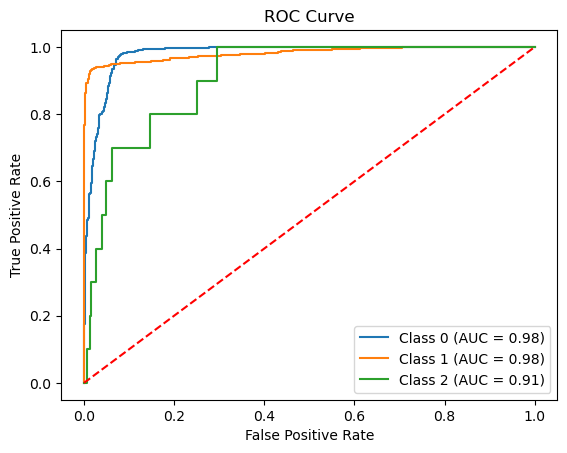

Do you want to save this model in summary? Y/Ny


In [153]:
model_validation(final,X_train_resampled,y_train_resampled,x_test,y_test)

Confusion matrix:
 [[2324    8    0]
 [  44  614    0]
 [  10    0    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2332
           1       0.99      0.93      0.96       658
           2       0.00      0.00      0.00        10

    accuracy                           0.98      3000
   macro avg       0.65      0.64      0.65      3000
weighted avg       0.98      0.98      0.98      3000

Micro-average ROC AUC: 0.9935161388888889


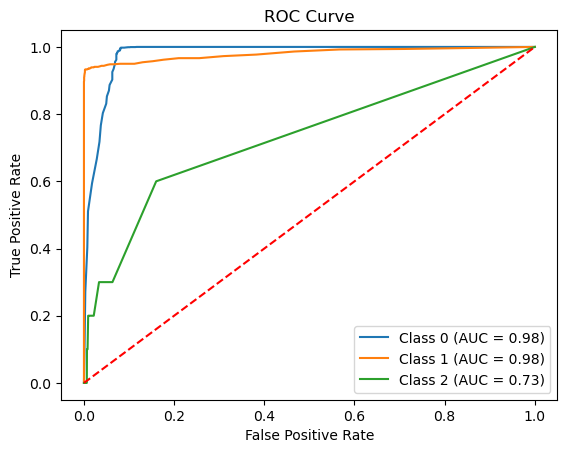

Do you want to save this model in summary? Y/Ny


In [154]:
model_validation(RandomForestClassifier(n_estimators=100,random_state=42),X_train_resampled,y_train_resampled,x_test,y_test)

Confusion matrix:
 [[2225   97   10]
 [ 415  240    3]
 [   9    0    1]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      2332
           1       0.71      0.36      0.48       658
           2       0.07      0.10      0.08        10

    accuracy                           0.82      3000
   macro avg       0.54      0.47      0.49      3000
weighted avg       0.81      0.82      0.80      3000

Micro-average ROC AUC: 0.9245520555555555


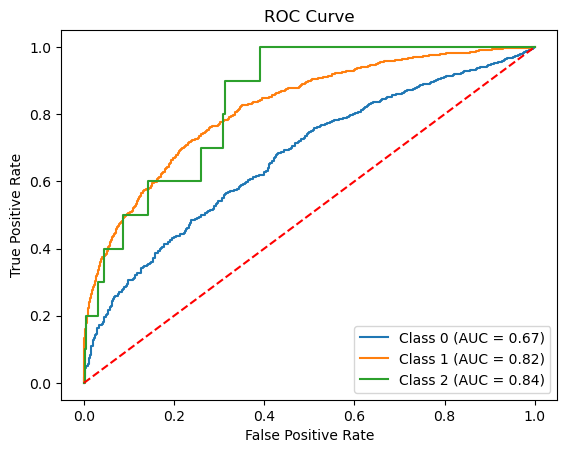

Do you want to save this model in summary? Y/Ny


In [155]:
model_validation(AdaBoostClassifier(),X_train_resampled,y_train_resampled,x_test,y_test)

Confusion matrix:
 [[2298   16   18]
 [  45  612    1]
 [   9    0    1]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2332
           1       0.97      0.93      0.95       658
           2       0.05      0.10      0.07        10

    accuracy                           0.97      3000
   macro avg       0.67      0.67      0.67      3000
weighted avg       0.97      0.97      0.97      3000

Micro-average ROC AUC: 0.9959301666666668


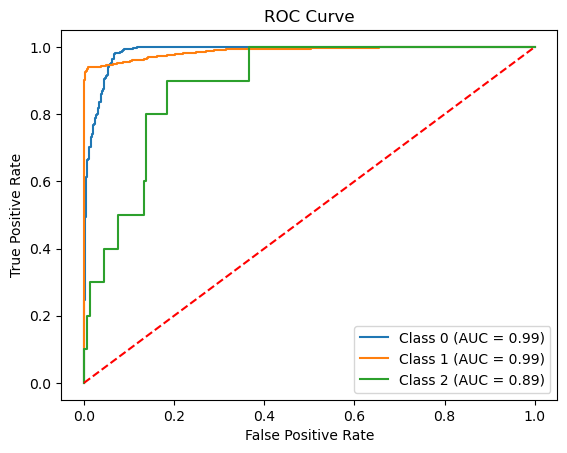

Do you want to save this model in summary? Y/Ny


In [156]:
model_validation(GradientBoostingClassifier(n_estimators=100),X_train_resampled,y_train_resampled,
                x_test,y_test)

Confusion matrix:
 [[2025   14  293]
 [  41  602   15]
 [   2    0    8]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      2332
           1       0.98      0.91      0.95       658
           2       0.03      0.80      0.05        10

    accuracy                           0.88      3000
   macro avg       0.66      0.86      0.64      3000
weighted avg       0.98      0.88      0.92      3000

Micro-average ROC AUC: 0.9789894722222223


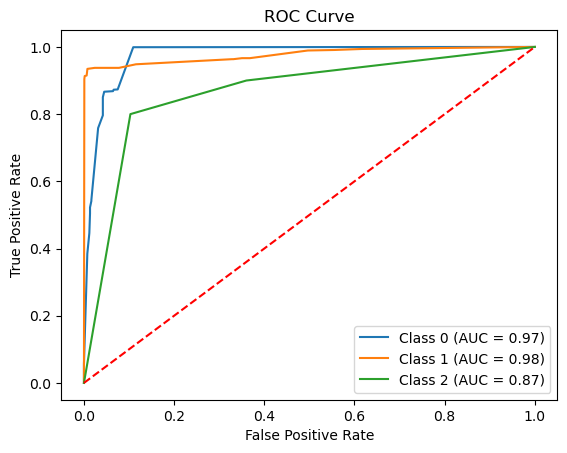

Do you want to save this model in summary? Y/Ny


In [157]:
model_validation(DecisionTreeClassifier(max_depth=5),X_train_resampled,y_train_resampled,
                x_test,y_test)

In [158]:
models_df

,Model,Accuracy,Recall_class_0,Recall_class_1,Recall_class_2,Precision_class_0,Precision_class_1,Precision_class_2,F1_class_0,F1_class_1,F1_class_2
0,MLPClassifier(max_iter=1000),0.964333,0.987564,0.896657,0.0,0.967241,0.965630,0.000000,0.977297,0.929866,0.000000
1,RandomForestClassifier(random_state=42),0.979333,0.996569,0.933131,0.0,0.977292,0.987138,0.000000,0.986837,0.959375,0.000000
2,AdaBoostClassifier(),0.822000,0.954117,0.364742,0.1,0.839940,0.712166,0.071429,0.893395,0.482412,0.083333
3,GradientBoostingClassifier(),0.970333,0.985420,0.930091,0.1,0.977041,0.974522,0.050000,0.981213,0.951788,0.066667
4,DecisionTreeClassifier(max_depth=5),0.878333,0.868353,0.914894,0.8,0.979207,0.977273,0.025316,0.920455,0.945055,0.049080


Confusion matrix:
 [[2318   10    4]
 [  48  610    0]
 [  10    0    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2332
           1       0.98      0.93      0.95       658
           2       0.00      0.00      0.00        10

    accuracy                           0.98      3000
   macro avg       0.65      0.64      0.65      3000
weighted avg       0.97      0.98      0.97      3000

Micro-average ROC AUC: 0.9957453055555556


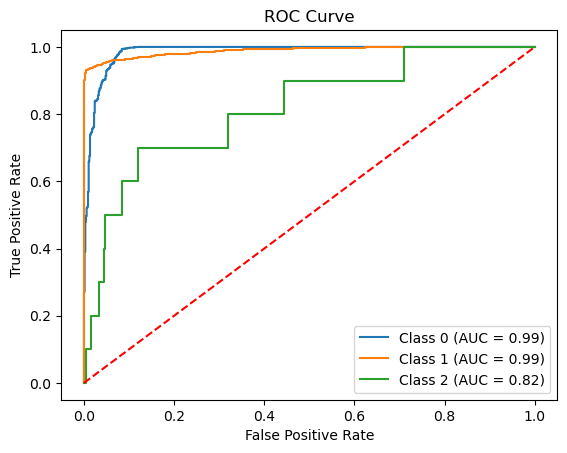

Do you want to save this model in summary? Y/Ny


In [164]:
model_validation(XGBClassifier(),X_train_resampled,y_train_resampled,x_test,y_test)

In [165]:
models_df

,Model,Accuracy,Recall_class_0,Recall_class_1,Recall_class_2,Precision_class_0,Precision_class_1,Precision_class_2,F1_class_0,F1_class_1,F1_class_2
0,MLPClassifier(max_iter=1000),0.964333,0.987564,0.896657,0.0,0.967241,0.965630,0.000000,0.977297,0.929866,0.000000
1,RandomForestClassifier(random_state=42),0.979333,0.996569,0.933131,0.0,0.977292,0.987138,0.000000,0.986837,0.959375,0.000000
2,AdaBoostClassifier(),0.822000,0.954117,0.364742,0.1,0.839940,0.712166,0.071429,0.893395,0.482412,0.083333
3,GradientBoostingClassifier(),0.970333,0.985420,0.930091,0.1,0.977041,0.974522,0.050000,0.981213,0.951788,0.066667
4,DecisionTreeClassifier(max_depth=5),0.878333,0.868353,0.914894,0.8,0.979207,0.977273,0.025316,0.920455,0.945055,0.049080
5,"XGBClassifier(base_score=None, booster=None, c...",0.976000,0.993997,0.927052,0.0,0.975589,0.983871,0.000000,0.984707,0.954617,0.000000
